# big bazaar Products Analysis

### importing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

## Importing dataset

In [3]:
df=pd.read_csv("BigBazaarProducts.csv")
df.head(3)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."


## Exploring Dataset

### shape of data

In [4]:
df.shape

(27555, 10)

#### Our data is having 27555 observations with 10 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


### This dataset contains 10 attributes with simple meaning and which are described as follows:

- index - Simply the Index!
- product - Title of the product (as they're listed)
- category - Category into which product has been classified
- sub_category - Subcategory into which product has been kept
- brand - Brand of the product
- sale_price - Price at which product is being sold on the site
- market_price - Market price of the product
- type - Type into which product falls
- rating - Rating the product has got from its consumers
- description - Description of the dataset (in detail)
description - Description of the dataset (in detail)

**Variable "discount" can be created as (marketprice - saleprice)/ market_price * 100 which will help in getting what consumers are getting better here!**

In [6]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**Here we can observe that the variables such as 'index' and 'description' is of no use in our analysis so we drop these columns**

Dropping "index" and "description" columns

In [7]:
df.drop(["description","index"],axis=1,inplace=True)

In [8]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [10]:
#df.describe()

In [11]:
#df.nunique()

### Checking duplicate values

In [12]:
df.duplicated().sum()

361

There is 361 attributes which have duplicate values

In [13]:
df[df.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,289.0,358.0,Glassware,NaN
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Ready To Cook & Eat,Aaha Oho,75.0,75.0,Breakfast & Snack Mixes,3.9
1887,100% Melamine 3D Soup Spoon - Blue,"Kitchen, Garden & Pets",Crockery & Cutlery,Iveo,264.0,264.0,Plates & Bowls,NaN
2139,Classic Sandalwood & Tulsi Hand Wash,Beauty & Hygiene,Bath & Hand Wash,Santoor,209.0,209.0,Hand Wash & Sanitizers,3.8
2952,Chai / Coffee/ Tea-Milk Mug - Sea With Ship Print,"Kitchen, Garden & Pets",Crockery & Cutlery,Rslee,299.0,299.0,"Cups, Mugs & Tumblers",NaN
...,...,...,...,...,...,...,...,...
27178,Rose Gold Beauty Oil,Beauty & Hygiene,Skin Care,The Beauty Co.,975.0,1250.0,Face Care,NaN
27371,"Adult Diapers Economy, Medium",Beauty & Hygiene,Health & Medicine,Friends,425.0,425.0,Adult Diapers,NaN
27375,Taft Ultimate Wax,Beauty & Hygiene,Hair Care,Schwarzkopf,425.0,425.0,Hair Care & Styling,NaN
27412,Whisky Tumblers/Glass,"Kitchen, Garden & Pets",Crockery & Cutlery,Yera,319.0,385.0,Glassware,NaN


#### Deleting duplicate values

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(27194, 8)

In [16]:
df.describe()

,sale_price,market_price,rating
count,27194.000000,27194.000000,18733.000000
mean,320.780278,380.174391,3.944334
std,486.004757,581.467633,0.735517
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,351.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


In [17]:
df.nunique()

product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
dtype: int64

### Checking null values

In [18]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8461
dtype: int64

### Checking percentage of null values in variable "product" , "brand" and "rating"

Percentage of missing values in "brand" column

In [19]:
float(100.0*(df.brand.isnull().sum()/df.shape[0]))

0.00367728175332794

Percentage of missing values in "product" column

In [20]:
float(100.0*(df['product'].isnull().sum()/df.shape[0]))

0.00367728175332794

Percentage of missing values in "product" column

In [21]:
float(100.0*(df.rating.isnull().sum()/df.shape[0]))

31.113480914907697

## Observation:
### Variable "product" and "brand" has 0.003% of missing values so its better to remove them but  variable "rating" has 31.11% of missing values so we replace missing values with either mean/mode/median or quantile

Droping missing values of variable "brand" and "product"

In [22]:
df.dropna(subset=["product","brand"],inplace=True)

In [23]:
df.isnull().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8460
dtype: int64

**Now checking satistical data of rating variable**

In [24]:
df.rating.describe()

count    18732.000000
mean         3.944320
std          0.735534
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64

Now we fill the missing rating values with mean value

In [25]:
df.rating.fillna(df.rating.mean(),inplace=True)

In [26]:
df.rating.describe()

count    27192.000000
mean         3.944320
std          0.610479
min          1.000000
25%          3.944320
50%          3.944320
75%          4.200000
max          5.000000
Name: rating, dtype: float64

In [27]:
df.rating.isnull().sum()

0

#### Creating new variable "discount" which is discount percentage using 'market_price' and 'sale_price' variables 
- discount = (market_price - sale_price)market_price*100

In [28]:
df['discount']=(df['market_price']-df['sale_price'])/df['market_price']*100

In [29]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000


### Finding Outliners

In [30]:
df.describe()

,sale_price,market_price,rating,discount
count,27192.000000,27192.000000,27192.000000,27192.000000
mean,320.794678,380.191688,3.944320,11.844565
std,486.019304,581.484948,0.610479,14.648973
min,2.450000,3.000000,1.000000,0.000000
25%,95.000000,100.000000,3.944320,0.000000
50%,190.000000,220.000000,3.944320,5.000000
75%,351.000000,425.000000,4.200000,20.000000
max,12500.000000,12500.000000,5.000000,83.666667


**After observing statistical values of dataset we come to know that 'sale_price' and 'market_price' variable have huge difference between 75 pecentile and max value so we plot boxplot to find outliners**

### Plotting boxplot to find outliners

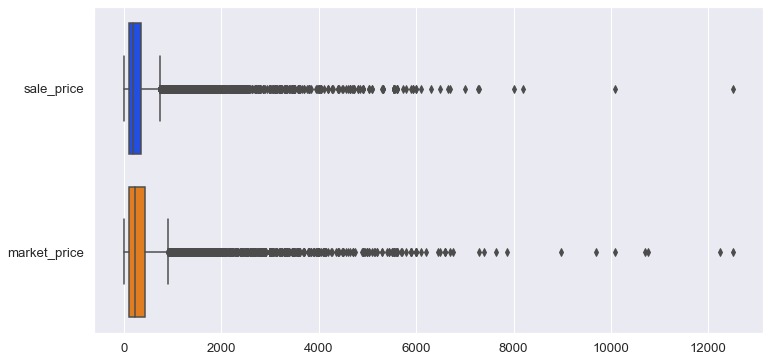

In [31]:
sns.set_palette("bright")
plt.figure(figsize=[12,6])
sns.boxplot(data=df[["sale_price", "market_price"]], orient="h")
plt.show()

**deleting the values after 11000 as they are outliners**

In [32]:
df=df.loc[df["sale_price"]<11000]
df=df.loc[df["market_price"]<11000]
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000


In [33]:
df.loc[df.sale_price>11000]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount


In [34]:
df.loc[df.market_price>11000]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount


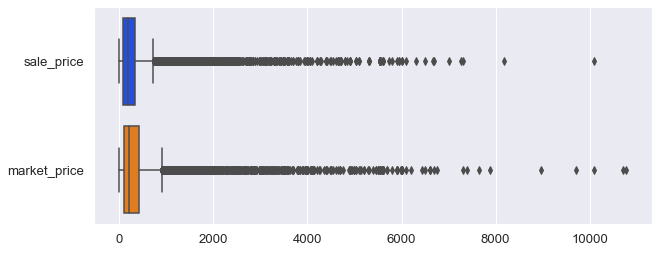

In [35]:
sns.set_palette("bright")
plt.figure(figsize=[10,4])
sns.boxplot(data=df[["sale_price", "market_price"]], orient="h")
plt.show()

In [36]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'discount'],
      dtype='object')

In [37]:
df.dtypes

product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
discount        float64
dtype: object

### categorical univariate analysis

our categorical variables : **"product", "category", "sub_category", "brand", "type"**

In [38]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

## 'category' variable

# Q.1 Lets check which category sales as more as count and as profit?

In [39]:
df['category'].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [40]:
df.category.value_counts()

Beauty & Hygiene            7677
Gourmet & World Food        4677
Kitchen, Garden & Pets      3455
Snacks & Branded Foods      2809
Foodgrains, Oil & Masala    2673
Cleaning & Household        2649
Beverages                    883
Bakery, Cakes & Dairy        850
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64

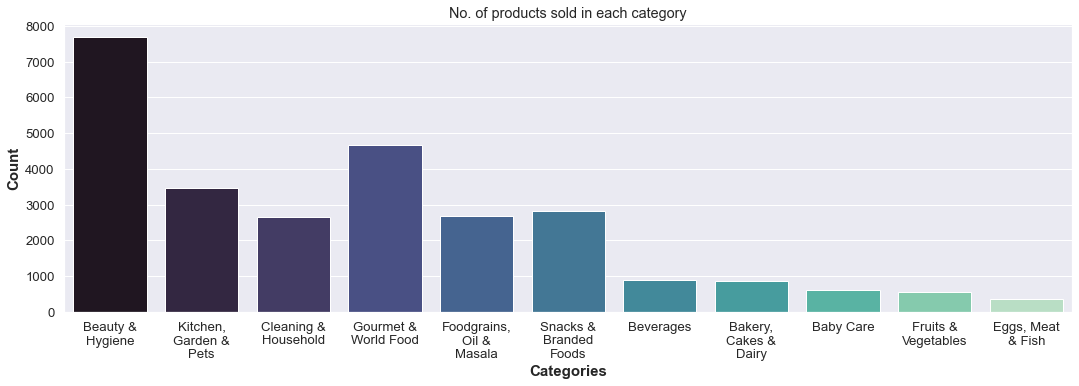

In [41]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'category', palette='mako')
plt.title('No. of products sold in each category')
ax.set_xlabel("Categories",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Notes:

As we see the most sold products from **Beauty & Hygiene** category and that seems the interest of indians. **Eggs, Meat & Fish** category has the least sold products that may indicate to low quality of these products.

In [42]:
data = pd.DataFrame(df.groupby('category')['sale_price'].sum()).reset_index()
data.columns = ['category', 'profit']
data

,category,profit
0,Baby Care,326317.17
1,"Bakery, Cakes & Dairy",121416.14
2,Beauty & Hygiene,3196823.85
3,Beverages,211936.67
4,Cleaning & Household,600115.09
5,"Eggs, Meat & Fish",101114.12
6,"Foodgrains, Oil & Masala",516641.23
7,Fruits & Vegetables,28345.36
8,Gourmet & World Food,1497153.06
9,"Kitchen, Garden & Pets",1738397.12


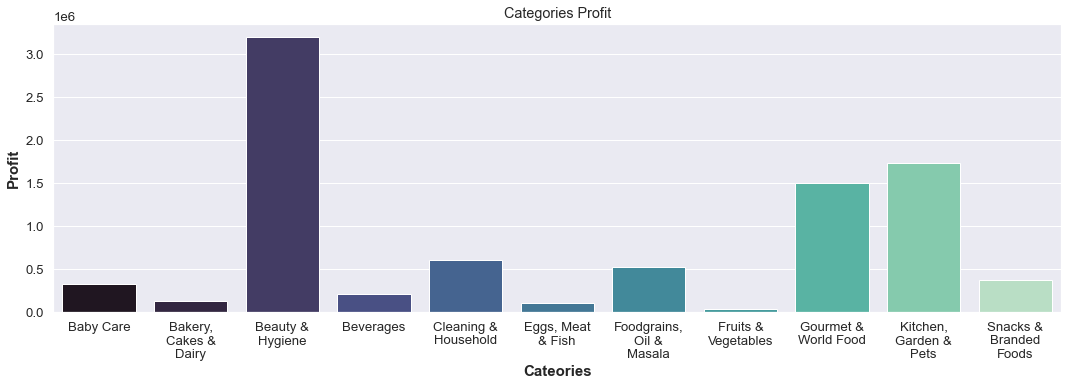

In [43]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'category', y = 'profit', palette='mako')
plt.title('Categories Profit')
ax.set_xlabel("Cateories",fontsize=15, weight='semibold')
ax.set_ylabel("Profit",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Notes:

As **Beauty & Hygiene** category product's was sold a lot, it's profit is so big. And still **Eggs, Meat & Fish** is least profit as well.

### Now lets check which category has highest and lowest sale percent?

In [44]:
cat_per=df.category.value_counts(normalize=True)*100
cat_per

Beauty & Hygiene            28.234645
Gourmet & World Food        17.201177
Kitchen, Garden & Pets      12.706878
Snacks & Branded Foods      10.331004
Foodgrains, Oil & Masala     9.830820
Cleaning & Household         9.742552
Beverages                    3.247517
Bakery, Cakes & Dairy        3.126149
Baby Care                    2.243472
Fruits & Vegetables          2.048547
Eggs, Meat & Fish            1.287238
Name: category, dtype: float64

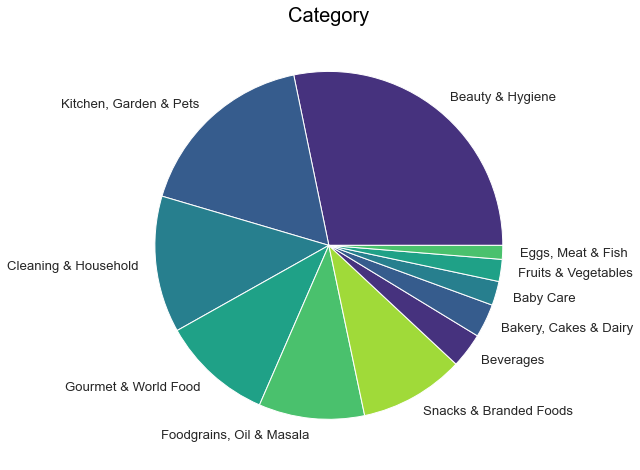

In [45]:
sns.set_palette("viridis")
plt.figure(figsize=[8,8])
cat_per=df.category.value_counts(normalize=True)*100
l=df.category.unique()
plt.pie(cat_per, labels = l)
plt.title("Category", fontsize=20,loc='center',color="black")
plt.show()


**Beauty & Hygiene** has highest sale percentage which is 28.234645%<br>
**Eggs, Meat & Fish** has lowest sale percent which is about 1.287238%



# Q2. Top 10 sold Products?

In [46]:
top_10 = pd.DataFrame(df[['product', 'category']].value_counts().head(10)).reset_index()
top_10.columns = ['product', 'category', 'count']
top_10

,product,category,count
0,Turmeric Powder/Arisina Pudi,"Foodgrains, Oil & Masala",26
1,Cow Ghee/Tuppa,"Foodgrains, Oil & Masala",14
2,Extra Virgin Olive Oil,Gourmet & World Food,14
3,Soft Drink,Beverages,12
4,Ghee/Tuppa,"Foodgrains, Oil & Masala",11
5,Powder - Coriander,"Foodgrains, Oil & Masala",11
6,Coriander Powder,"Foodgrains, Oil & Masala",11
7,Olive Oil - Extra Virgin,Gourmet & World Food,11
8,Hand Sanitizer,Beauty & Hygiene,10
9,Casting Creme Gloss Hair Color,Beauty & Hygiene,9


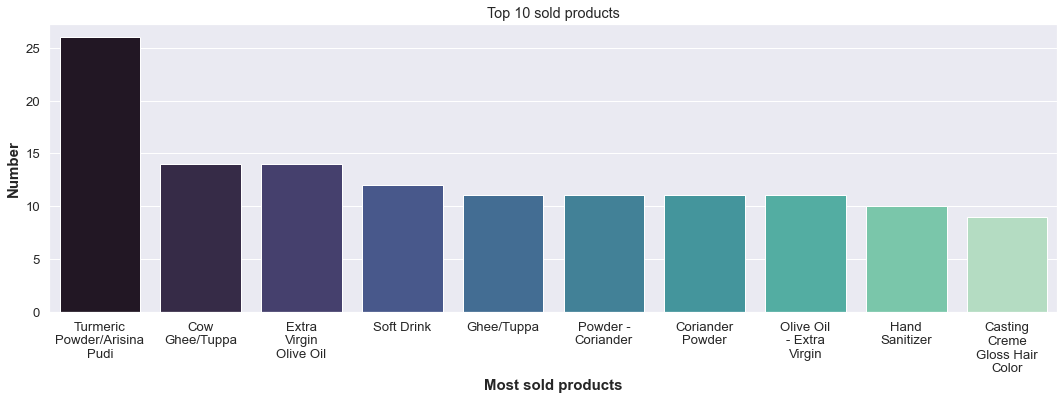

In [60]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = top_10, x = 'product', y = 'count', palette='mako')
plt.title('Top 10 sold products')
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

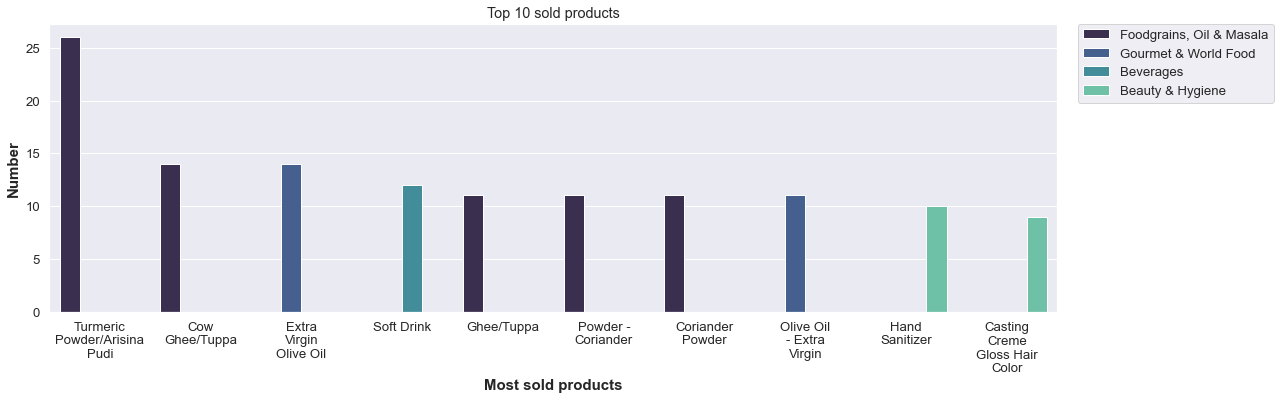

In [61]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = top_10, x = 'product', y = 'count', hue = 'category', palette='mako')
plt.title('Top 10 sold products')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Notes:

As we see from above analysis that bigbasket supermarket customers have interest in **Foodgrains, Oil & Masala** category. **Turmeric** is most sold product as it's on **Foodgrains, Oil & Masala** we can expect that indian is interest with haircare.

# Q3. Least 10 sold Products?

In [62]:
least_10 = pd.DataFrame(df[['product', 'category']].value_counts().tail(10)).reset_index()
least_10.columns = ['product', 'category', 'count']
least_10

,product,category,count
0,"Gel Pen - Black, Octane",Cleaning & Household,1
1,"Gel Pen - Black, Fasty",Cleaning & Household,1
2,Gel One Pen,Cleaning & Household,1
3,Gel Bathing Bar - Patchouli & Macadamia La Fan...,Beauty & Hygiene,1
4,Gel Bathing Bar - Multi Variant (Buy 4 & Get 1...,Beauty & Hygiene,1
5,"Gel Bathing Bar - Men, Energising Sport",Beauty & Hygiene,1
6,Gel Bathing Bar - Men Energising Sport,Beauty & Hygiene,1
7,Gel Bathing Bar - Bearberry & Blackcurrant,Beauty & Hygiene,1
8,Gel Bar - Peach & Avocado Mild Dew,Beauty & Hygiene,1
9,pasta shell,Snacks & Branded Foods,1


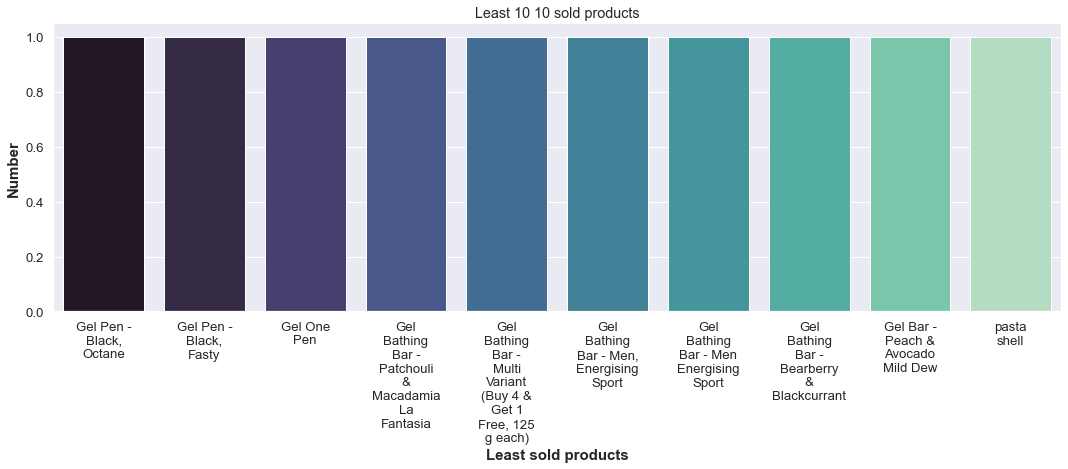

In [63]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = least_10, x = 'product', y = 'count', palette='mako')
plt.title('Least 10 10 sold products')
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

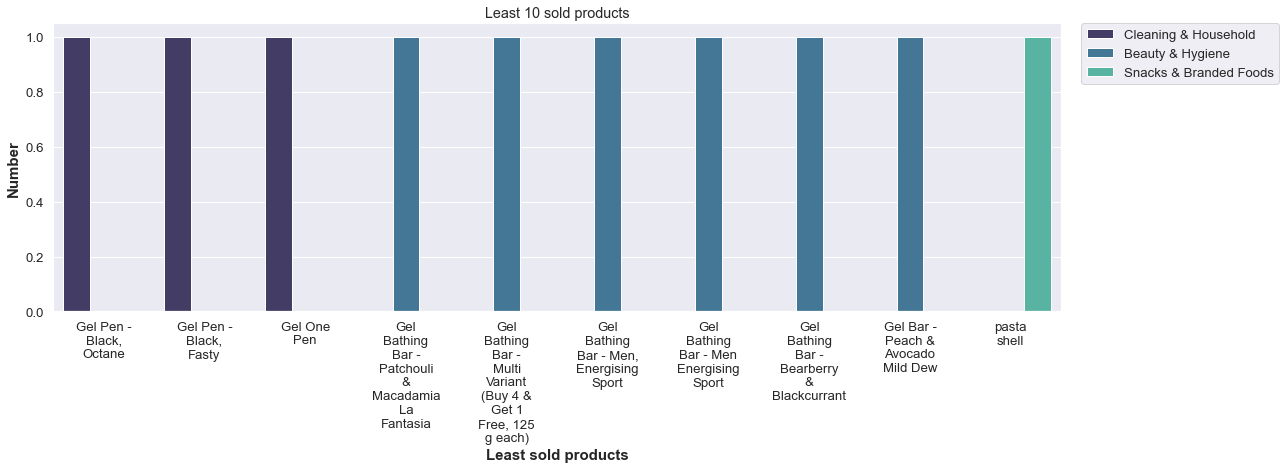

In [64]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = least_10, x = 'product', y = 'count', hue = 'category', palette='mako')
plt.title('Least 10 sold products')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Notes:

As we see least sold products is in **Cleaning & Household, Beatuy & Hygiene, and Snacks & Branded Foods**.

# Q.4 Which categories have rating greater than equalto 4

In [218]:
data = df[df['rating'] >= 4]
data

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,is_discount_product
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,0.000000,False
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,0.000000,False
7,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,0.000000,False
9,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3,0.000000,False
10,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,10.000000,True
...,...,...,...,...,...,...,...,...,...,...
27546,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,5.000000,True
27548,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,5.0,0.000000,False
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,10.000000,True
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,20.000000,True


<Figure size 720x720 with 0 Axes>

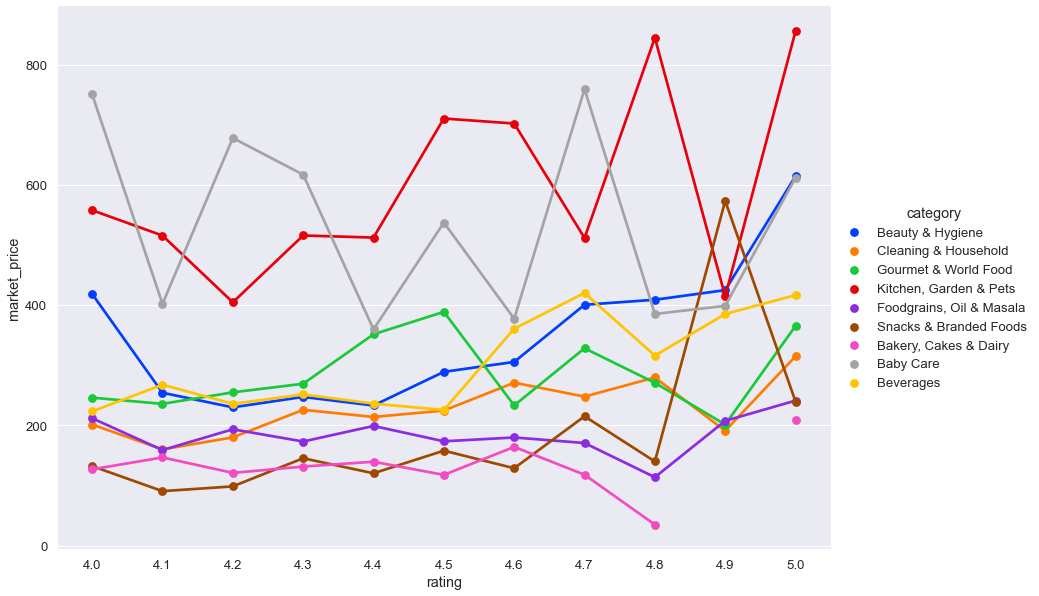

In [230]:
plt.figure(figsize=[10,10])
sns.catplot(x='rating',y='market_price',
            kind='point',data=data,hue='category',
            palette='bright',ci=None,height=8.27,aspect=11.7/8.27)
plt.show()

<Figure size 720x720 with 0 Axes>

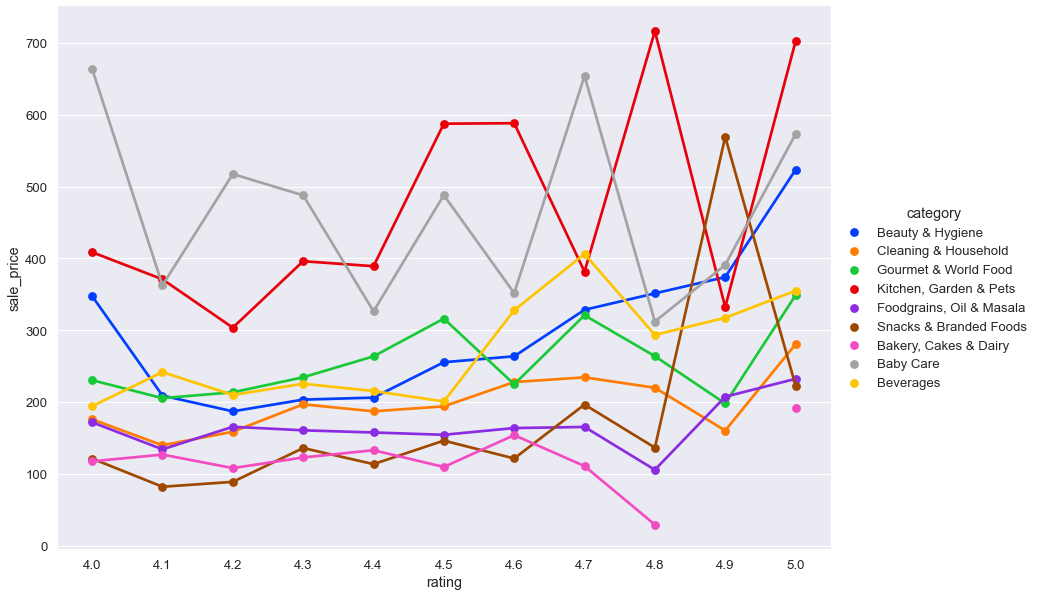

In [231]:
plt.figure(figsize=[10,10])
sns.catplot(x='rating',y='sale_price',
            kind='point',data=data,hue='category',
            palette='bright',ci=None,height=8.27,aspect=11.7/8.27)
plt.show()

<Figure size 720x720 with 0 Axes>

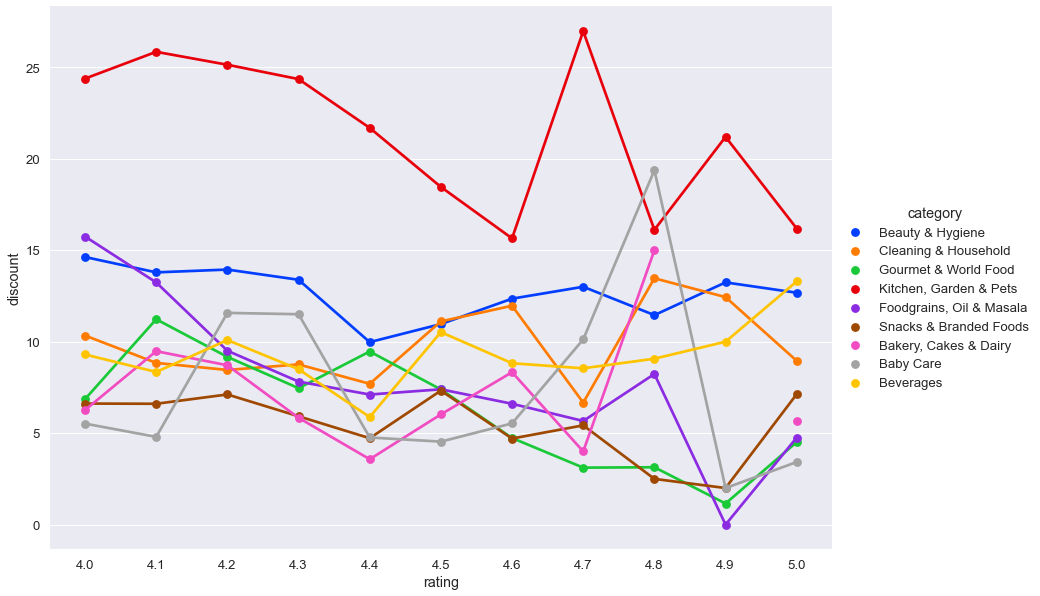

In [236]:
plt.figure(figsize=[10,10])
sns.catplot(x='rating',y='discount',
            kind='point',data=data,hue='category',
            palette='bright',ci=None,height=8.27,aspect=11.7/8.27)
plt.show()

In [83]:
data = pd.DataFrame(df.groupby('category')['rating'].count().reset_index())
data.columns = ['category','rating_count']
data

,category,rating_count
0,Baby Care,610
1,"Bakery, Cakes & Dairy",850
2,Beauty & Hygiene,7677
3,Beverages,883
4,Cleaning & Household,2649
5,"Eggs, Meat & Fish",350
6,"Foodgrains, Oil & Masala",2673
7,Fruits & Vegetables,557
8,Gourmet & World Food,4677
9,"Kitchen, Garden & Pets",3455


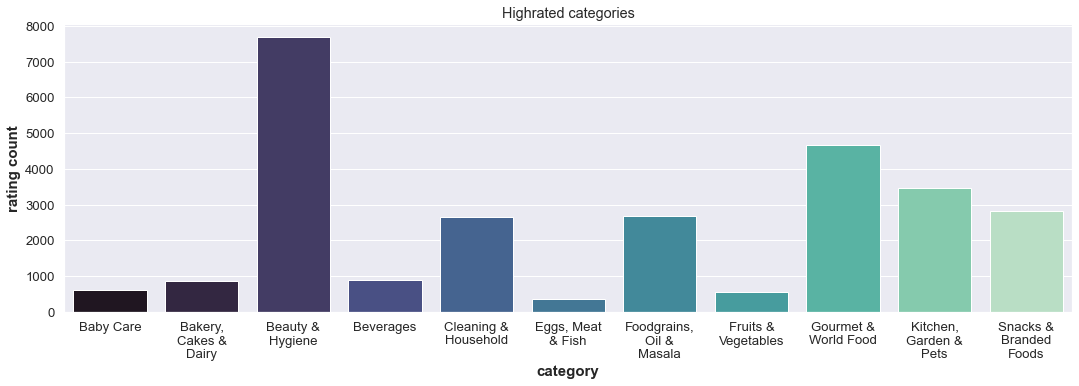

In [98]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'category', y = 'rating_count', palette='mako')
plt.title('Highrated categories')
ax.set_xlabel("category",fontsize=15, weight='semibold')
ax.set_ylabel("rating count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Beauty & Hygiene** is highly rated category

# Q5.1. What is count percentage between discounted products and original sale price products ?!

First we need to determine discounted products in our dataset

In [103]:
def is_discount_product(data):
    return ((data['market_price'] - data['sale_price']) != 0)

df['is_discount_product'] = df[['sale_price', 'market_price']].apply(is_discount_product, axis = 1)
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,is_discount_product
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.000000,False
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.000000,False
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000,True
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909,True
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.000000,False


In [104]:
df['is_discount_product'].value_counts()

True     15038
False    12152
Name: is_discount_product, dtype: int64

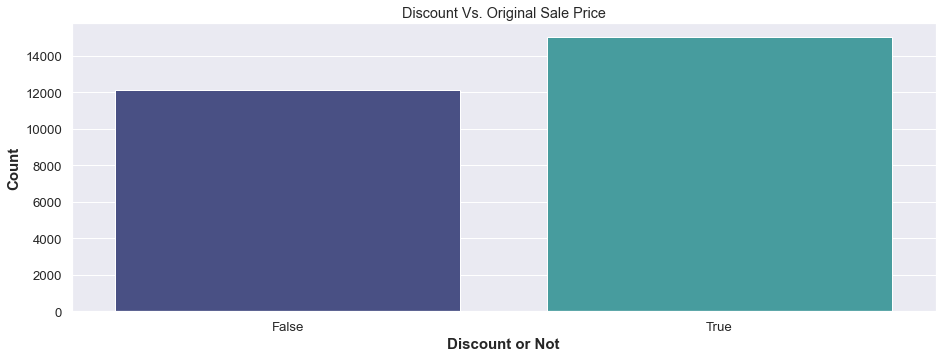

In [119]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'is_discount_product', palette='mako')
plt.title('Discount Vs. Original Sale Price')
ax.set_xlabel("Discount or Not",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Note:

As we see the percentage of **discount products** is more than **original products** sale price.

# Q5.2. What is profit percentage discounted products and original sale price products ?

In [107]:
df.groupby('is_discount_product').describe()['sale_price'].T

is_discount_product,False,True
count,12152.000000,15038.000000
mean,313.969499,324.989529
std,492.334622,466.292486
min,3.000000,2.450000
25%,88.000000,99.000000
50%,190.000000,189.125000
75%,350.000000,359.400000
max,10090.000000,8184.440000


In [108]:
data = pd.DataFrame(df.groupby('is_discount_product')['sale_price'].sum()).reset_index()
data.columns = ['is_discount_product', 'profit']
data

,is_discount_product,profit
0,False,3815357.35
1,True,4887192.54


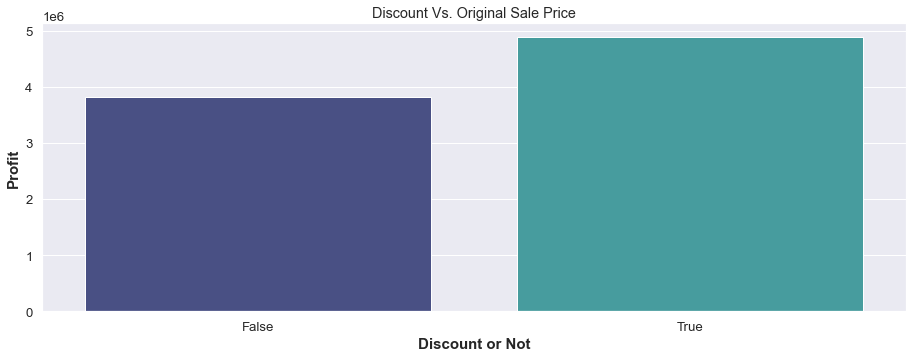

In [120]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'is_discount_product', y = 'profit', palette='mako')
plt.title('Discount Vs. Original Sale Price')
ax.set_xlabel("Discount or Not",fontsize=15, weight='semibold')
ax.set_ylabel("Profit",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Note:

**Discount Products** gives much more money than **Original Products** sale price so we may need to expand offers in other products.

And from that we can tell that there is a relationship between discount on products and total profit.

# Q. Is there a relationship between rating and sale_price ?

In [122]:
discount_data = df[df['is_discount_product'] == True]
discount_data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,is_discount_product
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,52.400000,True
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,15.340909,True
5,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,15.075377,True
10,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.0,290.0,Flours & Pre-Mixes,4.0,10.000000,True
15,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.0,59.0,Soap Cases & Dispensers,4.0,16.949153,True


Text(0.5, 1.0, 'Relative distribution of all products with discounted products')

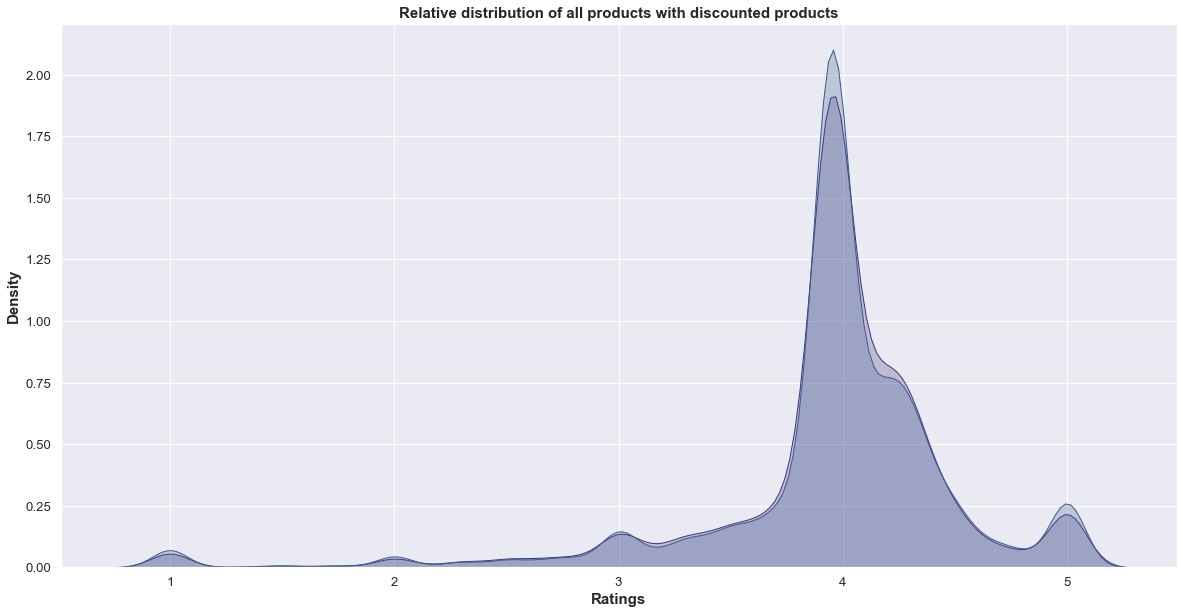

In [124]:
fig = plt.figure(figsize=(20,10))

sns.kdeplot(discount_data['rating'], shade=True)
sns.kdeplot(df['rating'], shade =True)
plt.xlabel("Ratings",fontsize=15, weight='semibold')
plt.ylabel("Density",fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products",fontsize=15, weight='semibold')


### Notes:

As we see from this graph blue shade represents **discounts products**, and brown shade represents **non-discounts products**:

**From that we saw that in rating (3.0 to 4.5) it's products have little increase in selling.
Even in rating (4.6 to 5) there is a little increase in selling in original sale_price.**

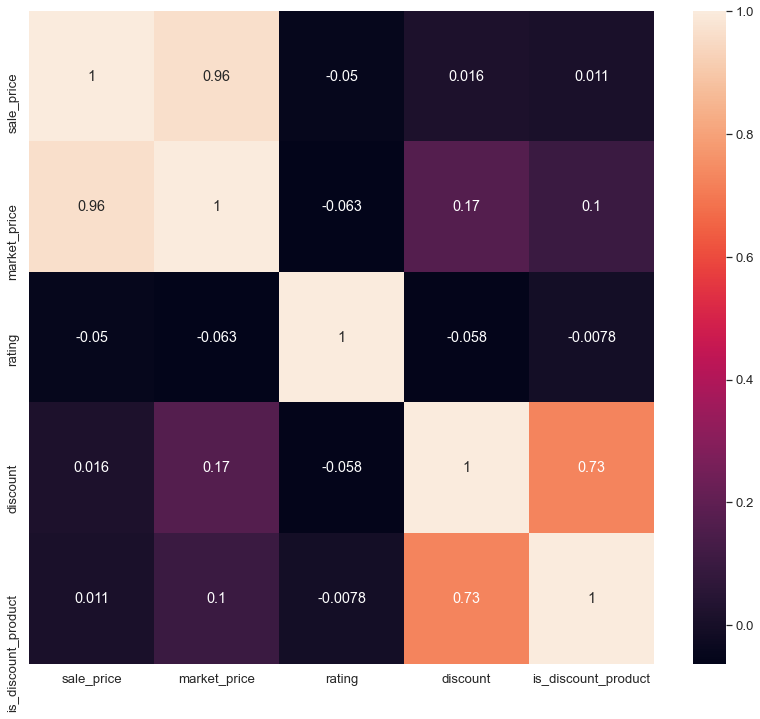

In [180]:
plt.figure(figsize=[14,12])
sns.heatmap(df.corr(),annot=True)
plt.show()

no correlation in dataset

In [134]:
df.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,is_discount_product
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.0,False
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.0,False


# Q6. Which brands sold highest number products?

In [268]:
data = pd.DataFrame(df.groupby('brand').size().reset_index())
data.columns=['brand','number']
a=data.sort_values(by='number',ascending=False).head(10).reset_index()
a.drop('index',axis=1)

,brand,number
0,Fresho,638
1,bb Royal,539
2,BB Home,428
3,DP,243
4,Fresho Signature,170
5,bb Combo,167
6,Amul,153
7,INATUR,142
8,Himalaya,141
9,Dabur,137


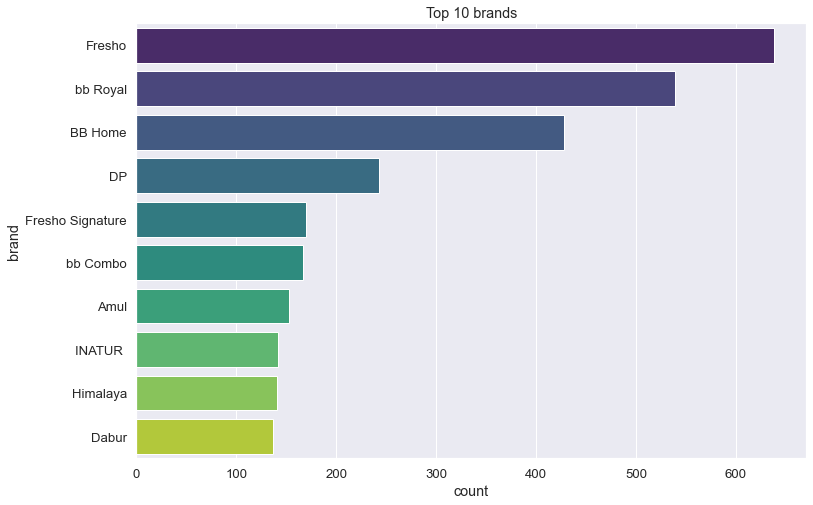

In [269]:
plt.figure(figsize=(12,8))
chart = sns.barplot(y="brand", data=a, x=a.number,palette="viridis")
chart.set_title("Top 10 brands")
plt.xlabel("count")
plt.show()

**Fresho** brand sold highest number of products

In [270]:
data = pd.DataFrame(df.groupby('brand')['rating'].sum().reset_index())
data.columns = ['brand','rating_count']
a=data.sort_values(by="rating_count",ascending=False).head(10).reset_index()
a.drop('index',axis=1)

,brand,rating_count
0,Fresho,2516.743124
1,bb Royal,2154.567489
2,BB Home,1716.301570
3,DP,982.370703
4,Fresho Signature,672.935501
5,bb Combo,659.024141
6,Amul,618.400000
7,Himalaya,583.488640
8,Dabur,552.592152
9,INATUR,546.237593


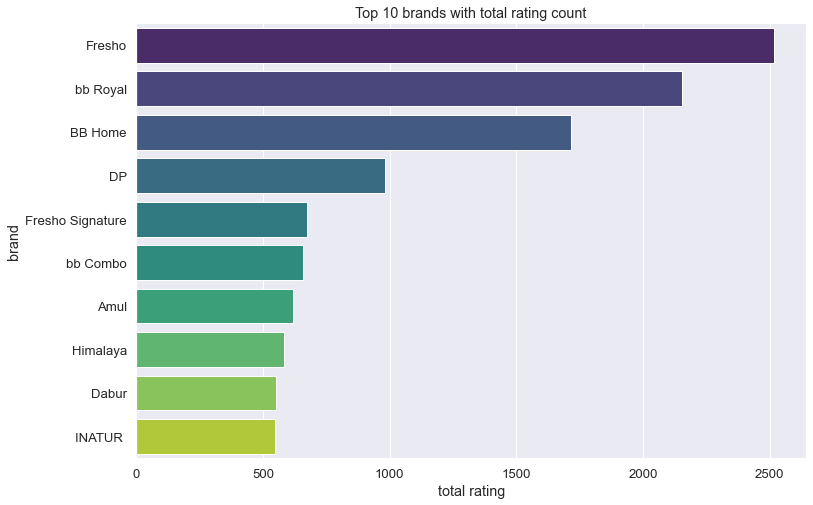

In [271]:
plt.figure(figsize=(12,8))
chart = sns.barplot(y="brand", data=a, x=a.rating_count,palette="viridis")
chart.set_title("Top 10 brands with total rating count")
plt.xlabel("total rating")
plt.show()

# Q.7 Product ratings count

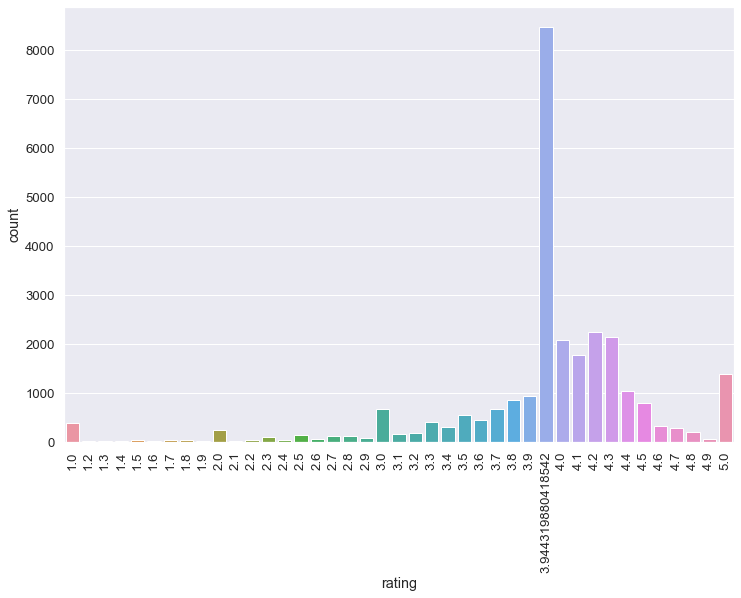

In [263]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=df)
plt.xticks(rotation=90)
plt.show()

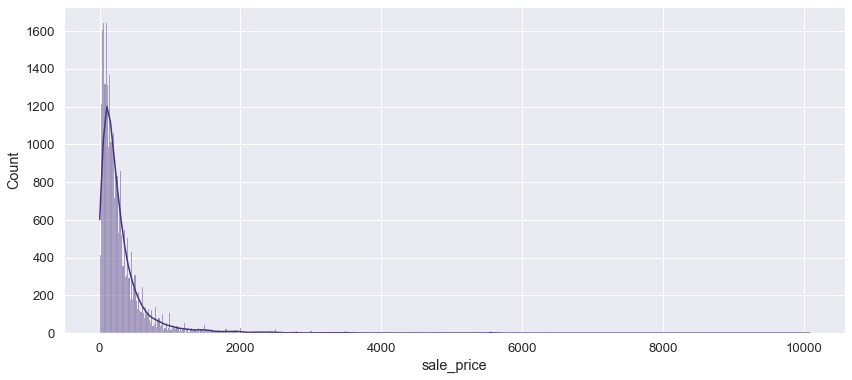

In [276]:
plt.figure(figsize=(14,6))
sns.histplot(x='sale_price', data=df, kde=True)
plt.show()

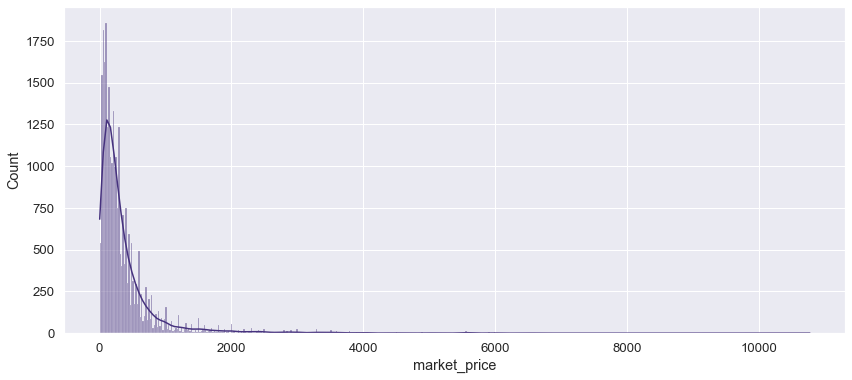

In [277]:
plt.figure(figsize=(14,6))
sns.histplot(x='market_price', data=df, kde=True)
plt.show()

In [244]:
normal_dist = np.log(df['sale_price'])

In [245]:
normal_dist1 = np.log(df['market_price'])

In [246]:
df['log_saleprice'] = normal_dist 

In [247]:
df['log_marketprice'] = normal_dist1

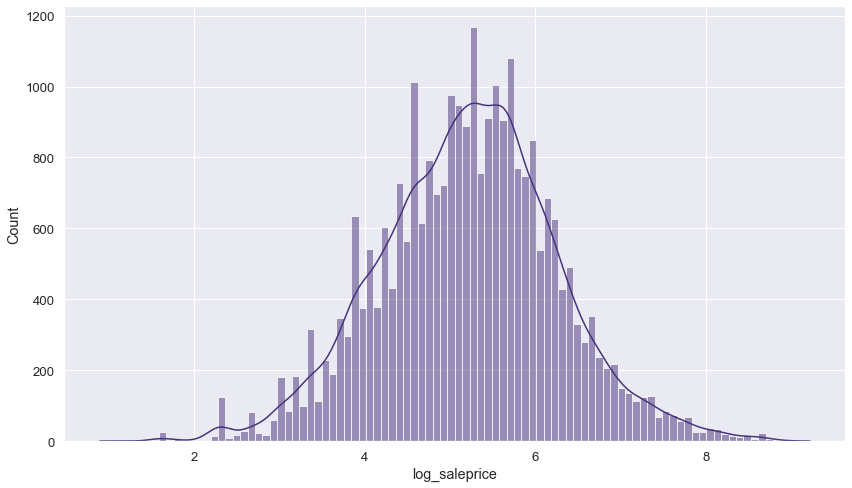

In [278]:
plt.figure(figsize=(14,8))
sns.histplot(x='log_saleprice',data=df, kde=True)
plt.show()

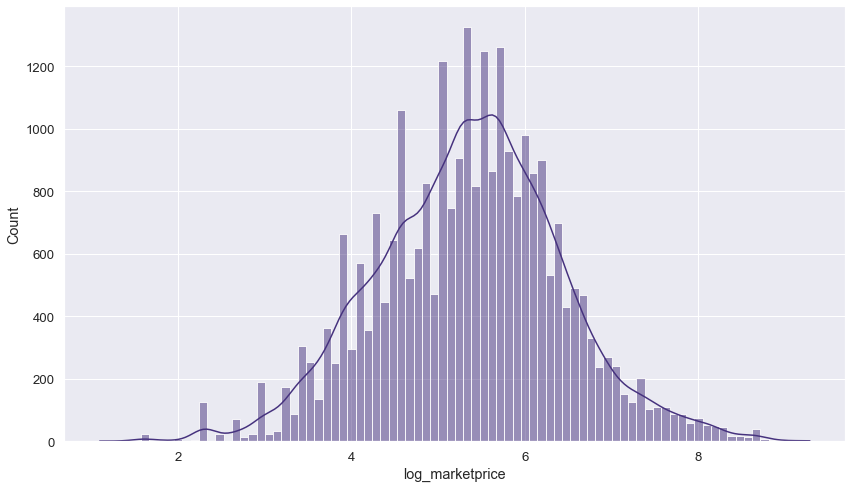

In [279]:
plt.figure(figsize=(14,8))
sns.histplot(x='log_marketprice',data=df, kde=True)
plt.show()